In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r"D:\EPL\topassist.csv")

# Drop unnecessary columns
drop_cols = [
    "Season", "Rank", "Player", "Club",
    "Crosses_Completed", "Assists_per_90",
    "xA_per_90", "Key_Passes_per_90"
]
df.drop(columns=drop_cols, inplace=True)


In [7]:
# Check nulls
print("Before filling:\n", df.isnull().sum())

# Fill numeric columns with mean
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical columns with 'Unknown'
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")

# Check again
print("\nAfter filling:\n", df.isnull().sum())


Before filling:
 Age                      0
Position                 0
Minutes_Played           0
Assists_prev_season      0
Goals_prev_season        0
Assists                  0
Key_Passes               0
Expected_Assists_(xA)    0
Dribbles_Completed       0
Shots_Assisted           0
Set_Piece_Involvement    0
Club_Total_Goals         0
Club_League_Rank         0
Big6_Club_Feature        0
Club_Attack_Share        0
Club_xG                  0
dtype: int64

After filling:
 Age                      0
Position                 0
Minutes_Played           0
Assists_prev_season      0
Goals_prev_season        0
Assists                  0
Key_Passes               0
Expected_Assists_(xA)    0
Dribbles_Completed       0
Shots_Assisted           0
Set_Piece_Involvement    0
Club_Total_Goals         0
Club_League_Rank         0
Big6_Club_Feature        0
Club_Attack_Share        0
Club_xG                  0
dtype: int64


In [6]:
# Check duplicates
print("Duplicates:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)


Duplicates: 0


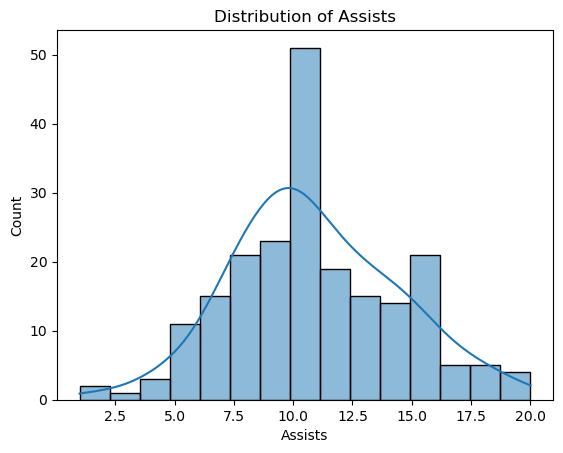

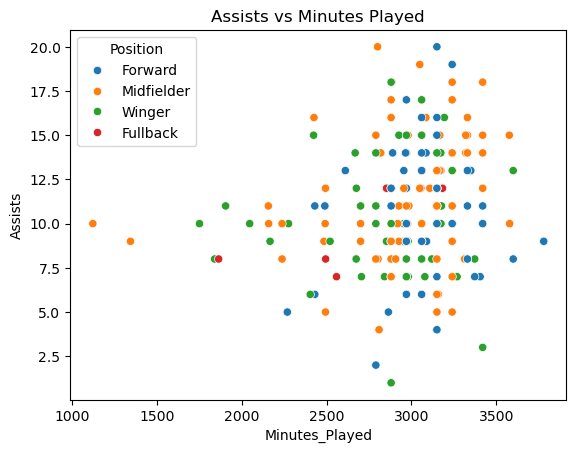

In [8]:
# Distribution of Assists
sns.histplot(df["Assists"], bins=15, kde=True)
plt.title("Distribution of Assists")
plt.show()

# Assists vs Minutes Played
sns.scatterplot(x="Minutes_Played", y="Assists", hue="Position", data=df)
plt.title("Assists vs Minutes Played")
plt.show()


In [9]:
# Example: Detect outliers in 'Assists'
Q1 = df["Assists"].quantile(0.25)
Q3 = df["Assists"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["Assists"] < (Q1 - 1.5 * IQR)) | (df["Assists"] > (Q3 + 1.5 * IQR))]
print("Outliers in Assists:", outliers.shape[0])


Outliers in Assists: 1
